In [48]:
#Import Dependencies
import bokeh.sampledata.olympics2014 as olympics
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Needed for Ensemble
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
import operator

In [40]:
#Load the initial dataset & list teh features
df2 = load_breast_cancer()
df2.feature_names, df2.data[0]

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error', 'fractal dimension error',
        'worst radius', 'worst texture', 'worst perimeter', 'worst area',
        'worst smoothness', 'worst compactness', 'worst concavity',
        'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
       dtype='|S23'),
 array([  1.79900000e+01,   1.03800000e+01,   1.22800000e+02,
          1.00100000e+03,   1.18400000e-01,   2.77600000e-01,
          3.00100000e-01,   1.47100000e-01,   2.41900000e-01,
          7.87100000e-02,   1.09500000e+00,   9.05300000e-01,
          8.58900000e+00,   1.53400000e+02,   6.39900000e-03,
          4.9040000

In [6]:
#Convert data to Pandas DataFrame
df = pd.DataFrame(df2.data, columns=df2.feature_names)
df_target = pd.DataFrame(df2.target, columns=['target'])
df_target = df_target.join(df)
df_target.head()

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df_positive = df_target.loc[df2['target'] == 1]
df_negative = df_target.loc[df2['target'] == 0]
print df_positive.describe(), df_negative.describe()

       target  mean radius  mean texture  mean perimeter   mean area  \
count   357.0   357.000000    357.000000      357.000000  357.000000   
mean      1.0    12.146524     17.914762       78.075406  462.790196   
std       0.0     1.780512      3.995125       11.807438  134.287118   
min       1.0     6.981000      9.710000       43.790000  143.500000   
25%       1.0    11.080000     15.150000       70.870000  378.200000   
50%       1.0    12.200000     17.390000       78.180000  458.400000   
75%       1.0    13.370000     19.760000       86.100000  551.100000   
max       1.0    17.850000     33.810000      114.600000  992.100000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       357.000000        357.000000      357.000000           357.000000   
mean          0.092478          0.080085        0.046058             0.025717   
std           0.013446          0.033750        0.043442             0.015909   
min           0.052630     

In [8]:
#List all columns of the dataset, identify how many unique values are in each column and list the data type
def unique_col_values(df):
    for column in df:
        print('{} | {} | {}'.format(
            df[column].name, len(df[column].unique()), df[column].dtype))
unique_col_values(df_target)

target | 2 | int64
mean radius | 456 | float64
mean texture | 479 | float64
mean perimeter | 522 | float64
mean area | 539 | float64
mean smoothness | 474 | float64
mean compactness | 537 | float64
mean concavity | 537 | float64
mean concave points | 542 | float64
mean symmetry | 432 | float64
mean fractal dimension | 499 | float64
radius error | 540 | float64
texture error | 519 | float64
perimeter error | 533 | float64
area error | 528 | float64
smoothness error | 547 | float64
compactness error | 541 | float64
concavity error | 533 | float64
concave points error | 507 | float64
symmetry error | 498 | float64
fractal dimension error | 545 | float64
worst radius | 457 | float64
worst texture | 511 | float64
worst perimeter | 514 | float64
worst area | 544 | float64
worst smoothness | 411 | float64
worst compactness | 529 | float64
worst concavity | 539 | float64
worst concave points | 492 | float64
worst symmetry | 500 | float64
worst fractal dimension | 535 | float64


In [9]:
#Determine how correlated the features are to the target
correlated = df_target.corr()
i = 0
for item in correlated[0:1]:
    if abs(correlated[0:1][item]['target']) > 0.7:
        print correlated[item]
        i += 1
        print i

target                     1.000000
mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0

In [10]:
#Create a new dataframe of the entities correlated with the target.
df_correlated = df_target.filter(['target', 'mean radius', 'mean perimeter', 'mean area', 'mean concavity',
                            'mean concave points', 'worst radius', 'worst perimeter','worst area','worst concave points'])
df_correlated.columns = ['target', 'mean_radius', 'mean_perimeter', 'mean_area', 'mean_concavity', 'mean_concave_points',
                         'worst_radius', 'worst_perimeter', 'worst_area', 'worst_concave_points']
df_correlated.describe()

,target,mean_radius,mean_perimeter,mean_area,mean_concavity,mean_concave_points,worst_radius,worst_perimeter,worst_area,worst_concave_points
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,91.969033,654.889104,0.088799,0.048919,16.269190,107.261213,880.583128,0.114606
std,0.483918,3.524049,24.298981,351.914129,0.079720,0.038803,4.833242,33.602542,569.356993,0.065732
min,0.000000,6.981000,43.790000,143.500000,0.000000,0.000000,7.930000,50.410000,185.200000,0.000000
25%,0.000000,11.700000,75.170000,420.300000,0.029560,0.020310,13.010000,84.110000,515.300000,0.064930
50%,1.000000,13.370000,86.240000,551.100000,0.061540,0.033500,14.970000,97.660000,686.500000,0.099930
75%,1.000000,15.780000,104.100000,782.700000,0.130700,0.074000,18.790000,125.400000,1084.000000,0.161400
max,1.000000,28.110000,188.500000,2501.000000,0.426800,0.201200,36.040000,251.200000,4254.000000,0.291000


In [41]:
def kmeans_cluster(df, n_clusters=2):
    '''Run a KMeans cluster. Default the number of clusters to 2 if n_clusters isn't passed into the function.'''
    model = KMeans(n_clusters=n_clusters, random_state=1)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

def summarize_clustering(results):
    '''Summarize the cluster'''
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    return cluster_summary

#Cluster the attributes
cluster_columns = ['mean_radius', 'mean_perimeter', 'mean_area', 'mean_concavity', 'mean_concave_points',
                         'worst_radius', 'worst_perimeter', 'worst_area', 'worst_concave_points']

#Initialize the a scaler object to normalize the values in the cluster.
scaler = preprocessing.MaxAbsScaler()

clusters = scaler.fit_transform(df_correlated[cluster_columns])
clusters = pd.DataFrame(clusters, columns=cluster_columns)
clusters

,mean_radius,mean_perimeter,mean_area,mean_concavity,mean_concave_points,worst_radius,worst_perimeter,worst_area,worst_concave_points
0,0.639986,0.651459,0.400240,0.703140,0.731113,0.704218,0.734873,0.474612,0.912027
1,0.731768,0.705040,0.530188,0.203608,0.348757,0.693396,0.632166,0.459803,0.639175
2,0.700462,0.689655,0.481008,0.462512,0.635686,0.653996,0.607086,0.401740,0.835052
3,0.406261,0.411565,0.154378,0.565604,0.522863,0.413707,0.393591,0.133451,0.884880
4,0.721807,0.716711,0.518593,0.463918,0.518390,0.625416,0.605892,0.370240,0.558419
5,0.442903,0.438037,0.190764,0.369728,0.402038,0.429245,0.411624,0.174330,0.598282
6,0.649235,0.634483,0.415834,0.264058,0.367793,0.634850,0.609873,0.377527,0.663918
7,0.487727,0.478515,0.231068,0.219447,0.297465,0.473363,0.440287,0.210860,0.534708
8,0.462469,0.464191,0.207837,0.435567,0.464861,0.429800,0.422771,0.173789,0.707904
9,0.443259,0.445464,0.190284,0.532568,0.424602,0.418701,0.388734,0.167231,0.759450


In [14]:
cluster_results = kmeans_cluster(clusters, 3)
cluster_summary = summarize_clustering(cluster_results)
cluster_results.head()

,mean_radius,mean_perimeter,mean_area,mean_concavity,mean_concave_points,worst_radius,worst_perimeter,worst_area,worst_concave_points,Cluster
0,0.639986,0.651459,0.400240,0.703140,0.731113,0.704218,0.734873,0.474612,0.912027,0
1,0.731768,0.705040,0.530188,0.203608,0.348757,0.693396,0.632166,0.459803,0.639175,0
2,0.700462,0.689655,0.481008,0.462512,0.635686,0.653996,0.607086,0.401740,0.835052,0
3,0.406261,0.411565,0.154378,0.565604,0.522863,0.413707,0.393591,0.133451,0.884880,2
4,0.721807,0.716711,0.518593,0.463918,0.518390,0.625416,0.605892,0.370240,0.558419,0


In [15]:
cluster_summary

,Cluster,Count,mean_radius,mean_perimeter,mean_area,mean_concavity,mean_concave_points,worst_radius,worst_perimeter,worst_area,worst_concave_points
0,0,101,0.710476,0.704115,0.502599,0.471708,0.556443,0.681396,0.656457,0.440562,0.705165
1,1,309,0.421182,0.402403,0.175317,0.084923,0.107607,0.361572,0.335465,0.124385,0.225192
2,2,159,0.528680,0.516709,0.277093,0.279884,0.307506,0.479945,0.459116,0.219195,0.523816


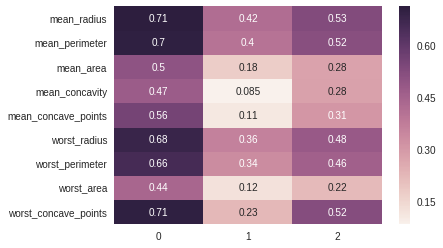

In [16]:
#Run a heatmap of the clusters to visualize the similarity if any of clusters.
#If there are multiple columns similar in color, reduce the number of clusters.
sns.heatmap(cluster_summary[cluster_columns].T, annot=True)

In [17]:
#Append the dataframe with the cluster value. This can be used in modeling.
df_correlated['Cluster'] = cluster_results.Cluster
df_correlated.head()

,target,mean_radius,mean_perimeter,mean_area,mean_concavity,mean_concave_points,worst_radius,worst_perimeter,worst_area,worst_concave_points,Cluster
0,0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.2654,0
1,0,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.1860,0
2,0,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.2430,0
3,0,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.2575,2
4,0,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.1625,0


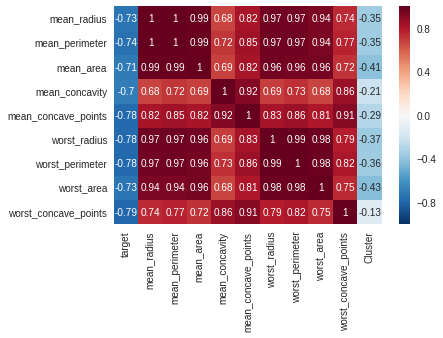

In [159]:
#Determine the correlation of the existing features heatmap
#This will be used to determine if feature reduction is needed.
correlated = df_correlated.corr()
sns.heatmap(correlated[cluster_columns].T, annot=True)

This heatmap shows there is potential to combine some of the features using a feature reduction algorithm like PCA.

[  9.83616422e-01   1.62492906e-02   1.25872769e-04]


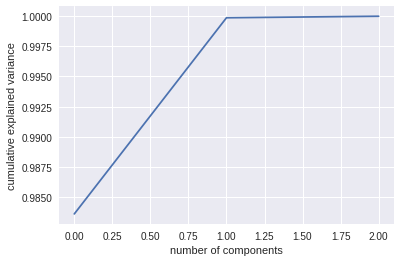

In [18]:
#Run PCA to and use matplotlib to visualize how many components are needed to use to get maximum lift.
from sklearn.decomposition import PCA
df_pca = PCA(n_components=3)
df_pca.fit(df_correlated)
print(df_pca.explained_variance_ratio_)
plt.plot(np.cumsum(df_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [22]:
df_pca.components_.shape

(3, 11)

In [23]:
#Partition the data into Training and Testing datasets for Cross Validation
X_train, X_test, Y_train, Y_test = train_test_split(df_correlated.drop('target', axis=1), df_correlated.target, test_size=0.4, random_state=42)

In [31]:
#Create two new attributes using the PCA Algorithim to use for prediction
X_train_pca = df_pca.fit_transform(X_train)
X_test_pca = df_pca.fit_transform(X_test)
X_all_pca = df_pca.fit_transform(df_correlated.drop('target', axis=1))
Y_all = df_correlated.target

In [33]:
print X_train_pca.shape, X_train.shape, X_all_pca.shape, Y_all.shape

(341, 3) (341, 10) (569, 3) (569,)


In [ ]:
#Ensemble the predictions
#Create Gaussian and Random Forest Predictions and add to the dataset
#Use the pattern documented in http://sebastianraschka.com/Articles/2014_ensemble_classifier.html

In [62]:
#Import ML Libraries and Create Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

learners = ['GaussianNB', 'RandomForestClassifier', 'SVC', 'KNeighborsClassifier']
clf1 = GaussianNB()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')
clf5 = KNeighborsClassifier(n_neighbors=3)

In [63]:
#Run K-Folds of the pca dataset and get the initial accuracy of each of the five models initialized above.
for clf, label in zip([clf1, clf2, clf3, clf4, clf5], learners):
    scores = cross_val_score(clf, X_all_pca, Y_all, cv = 5, scoring='accuracy')
    print ('Accuracy : %0.2f (+/- %0.2f) [%s]' %(scores.mean(), scores.std(), label))

Accuracy : 0.91 (+/- 0.01) [GaussianNB]
Accuracy : 0.94 (+/- 0.03) [RandomForestClassifier]
Accuracy : 0.93 (+/- 0.02) [SVC]
Accuracy : 0.93 (+/- 0.01) [KNeighborsClassifier]


In [71]:
#Run K-Folds of the correlation dataset and get the initial accuracy of each of the five models. 
#Run K-Folds of the pca dataset and get the initial accuracy of each of the five models initialized above.
weights = []
for clf, label in zip([clf1, clf2, clf3, clf4], learners):
    scores = cross_val_score(clf, df_correlated.drop('target', axis=1), df_correlated['target'], cv = 5, scoring='accuracy')
    print ('Accuracy : %0.2f (+/- %0.2f) [%s]' %(scores.mean(), scores.std(), label))
    weights.append(scores.mean())
print('All weights:', weights)

Accuracy : 0.93 (+/- 0.03) [GaussianNB]
Accuracy : 0.94 (+/- 0.02) [RandomForestClassifier]
Accuracy : 0.95 (+/- 0.02) [SVC]
Accuracy : 0.93 (+/- 0.02) [KNeighborsClassifier]
('All weights:', [0.92637168141592918, 0.94391689111196619, 0.9472720277029627, 0.9333282031550596])


There is a slightly better accuracy from running the full DataFrame(without PCA). The rest of the modeling will be done with the df_correlated dataframe.

In [65]:
class EnsembleClassifier(BaseEstimator, ClassifierMixin):
    '''Ensemble classifier for scikit-learn estimators
    
    Parameters
    clf : iterable
        A list of scikit-learn clssifier objects.
    weights: list (default: None)
        If None, the majority rule voting will be applied to the predicted class labels.
        If a list of weights (float or int) is provided, the averaged raw probabilities
        will be used to determin the most confident class label
    '''
    
    def __init__(self, clfs, weights=None):
        self.clfs = clfs
        self.weights = weights
        
    def fit(self, X, y):
        '''fit the scikit-learn estimators
        
        Parameters
        X: numpy array, shape = [n_samples, n_features]
            Training data
        y: list or numpy array, shape = [n_samplX:nmes]
            class labels
        '''
        
        for clf in self.clfs:
            clf.fit(X, y)
            
    def predict(self, X):
        '''
        Parameters
        
        X : numpy array, shape = [n_samples, n_features]
        
        Returns 
        
        maj: list or numpy array, shape = [n_samples]
            predicted class labels by majority rule
        '''
        
        self.classes_ = np.asarray([clf.predict(X) for clf in self.clfs])
        if self.weights:
            avg = self.predict_proba(X)
            maj = np.apply_along_axis(lambda x: max(enumerate(x), key=operator.itemgetter(1))[0], axis=1, arr=avg)
        else:
            maj = np.asarray([np.argmax(np.bincount(self.classes_[:,c])) for c in range(self.classes_.shape[1])])
        
        return maj
    def predict_proba(self, X):
        '''
        Parameters
        
        X: numpy array, shape = [n_samples, n_features]
        
        Returns
        avg : list or numpy array, shape = [n_samples, n_probabilities]
            Weighted average probability for each class per sample
            
        '''
        
        self.probas_ = [clf.predict_proba(X) for clf in self.clfs]
        avg = np.average(self.probas_, axis=0, weights=self.weights)
        
        return avg

In [74]:
eclf = EnsembleClassifier(clfs=[clf1, clf2, clf3, clf4], weights=[weights])

learners.append('Ensemble')
for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['GaussianNB', 'RandomForest', 'SVC', 'KNeighbors', 'Ensemble']):
    scores = cross_val_score(clf, df_correlated.drop('target', axis=1), df_correlated['target'], cv=5, scoring='accuracy')
    print('Accuracy: %0.2f (+/1 %0.2f) [%s]' % (scores.mean(), scores.std(), label))

Accuracy: 0.93 (+/1 0.03) [GaussianNB]
Accuracy: 0.94 (+/1 0.02) [RandomForest]
Accuracy: 0.95 (+/1 0.02) [SVC]
Accuracy: 0.93 (+/1 0.02) [KNeighbors]
Accuracy: 0.91 (+/1 0.02) [Ensemble]


In [75]:
eclf = EnsembleClassifier(clfs=[clf1, clf2, clf3, clf4], weights=[weights])

learners.append('Ensemble')
for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['GaussianNB', 'RandomForest', 'SVC', 'KNeighbors', 'Ensemble']):
    scores = cross_val_score(clf, X_all_pca, Y_all, cv=5, scoring='accuracy')
    print('Accuracy: %0.2f (+/1 %0.2f) [%s]' % (scores.mean(), scores.std(), label))

Accuracy: 0.91 (+/1 0.01) [GaussianNB]
Accuracy: 0.93 (+/1 0.02) [RandomForest]
Accuracy: 0.93 (+/1 0.02) [SVC]
Accuracy: 0.94 (+/1 0.02) [KNeighbors]
Accuracy: 0.91 (+/1 0.02) [Ensemble]
